In [4]:
import os
import pandas as pd

In [5]:

# Read the CSV file
df = pd.read_csv('food_wastage_data.csv')

# Display the dataframe
# print(df)


In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df)

# Display the preprocessed dataframe
df_encoded.replace({True: 1, False: 0}, inplace=True)

print(df_encoded.columns)

Index(['Number of Guests', 'Quantity of Food', 'Wastage Food Amount',
       'Type of Food_Baked Goods', 'Type of Food_Dairy Products',
       'Type of Food_Fruits', 'Type of Food_Meat', 'Type of Food_Vegetables',
       'Event Type_Birthday', 'Event Type_Corporate',
       'Event Type_Social Gathering', 'Event Type_Wedding',
       'Storage Conditions_Refrigerated',
       'Storage Conditions_Room Temperature', 'Purchase History_Occasional',
       'Purchase History_Regular', 'Seasonality_All Seasons',
       'Seasonality_Summer', 'Seasonality_Winter', 'Preparation Method_Buffet',
       'Preparation Method_Finger Food', 'Preparation Method_Sit-down Dinner',
       'Geographical Location_Rural', 'Geographical Location_Suburban',
       'Geographical Location_Urban', 'Pricing_High', 'Pricing_Low',
       'Pricing_Moderate'],
      dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_4868\896033673.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({True: 1, False: 0}, inplace=True)


In [7]:
# Split the data into input features (X) and the target variable (y)
y = df_encoded["Wastage Food Amount"]
X = df_encoded.drop(columns=["Wastage Food Amount"])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning algorithm and create an instance of the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 25.256443409844607
R-squared: 0.7563478558273058


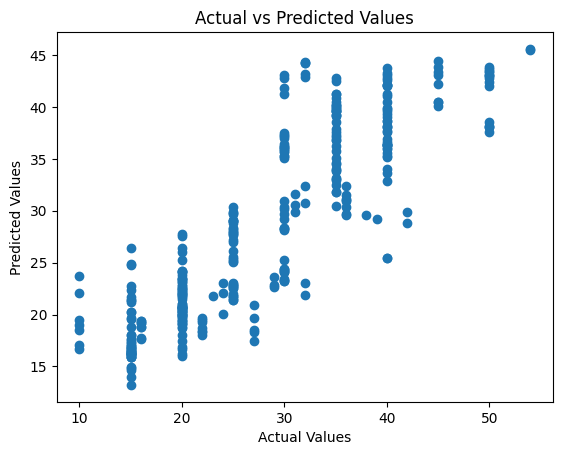

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [10]:
import pickle
model_out = open("model.pkl","wb")
pickle.dump(model, model_out)
model_out.close()